In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from scipy.linalg import svd

In [19]:
# Load the dataset
file_path = "../numerical_data.csv"  # Update path if needed
df = pd.read_csv(file_path, index_col="id")

In [20]:
# Standardize the dataset
scaler = StandardScaler()
America_standardized = pd.DataFrame(scaler.fit_transform(df))

# Compute mean and standard deviation
feature_stats = pd.DataFrame({
    "Mean": America_standardized.mean(),
    "Standard Deviation": America_standardized.std()
})
print("\nFeature Statistics (Standardized Data):\n", feature_stats)


Feature Statistics (Standardized Data):
             Mean  Standard Deviation
0   2.158206e-16            1.000045
1  -8.965839e-17            1.000045
2  -8.325422e-18            1.000045
3   7.044588e-17            1.000045
4  -5.763754e-17            1.000045
5  -9.222006e-17            1.000045
6  -1.332067e-16            1.000045
7   4.354836e-17            1.000045
8   3.714419e-17            1.000045
9   5.123337e-17            1.000045
10  6.083962e-18            1.000045
11  3.074002e-17            1.000045
12  4.098669e-17            1.000045
13 -2.433585e-17            1.000045
14 -3.586336e-17            1.000045
15  2.305501e-17            1.000045
16 -6.148004e-17            1.000045
17  1.665084e-17            1.000045
18 -1.537001e-17            1.000045
19  5.123337e-18            1.000045
20 -6.148004e-17            1.000045
21 -2.049335e-17            1.000045
22  3.778461e-17            1.000045
23 -1.460151e-16            1.000045
24  2.049335e-17            1.000

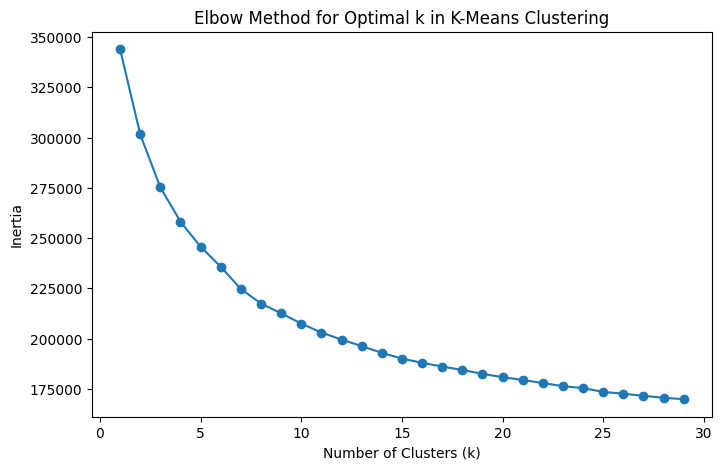

In [21]:
inertia = []
k_values = range(1, 30)  # Testing k from 2 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(America_standardized)
    inertia.append(kmeans.inertia_)

# Plot elbow method to determine optimal k
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker="o", linestyle="-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k in K-Means Clustering")
plt.show()

In [22]:
from sklearn.cluster import KMeans

# Define the number of clusters
k = 3

# Initialize and fit the KMeans model on your standardized data
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
America = pd.DataFrame()
America['Cluster'] = kmeans.fit_predict(America_standardized)

# Optionally, check the cluster centers
print("Cluster centers:\n", kmeans.cluster_centers_)

Cluster centers:
 [[-0.29430508  0.08319671 -0.19565483  0.19182246  0.28114879  0.18349068
   0.02102748  0.08237991  0.26754206  0.2417356  -0.0094178   0.17120838
   0.26456629  0.2199112   0.24490435 -0.0558181   0.15083257  0.14580504
   0.37608415 -0.78766091  0.62317163  0.76301502  0.67682124  0.59949672
   0.55931348  0.42834964  0.28061746  0.15321128  0.22981477  0.20042161
   0.26538474]
 [-0.24006535  0.34278197 -0.32923773  0.15139456 -0.02511747  0.26617913
   0.35984949  0.30587209  0.15746645  0.21898549  0.01626337 -0.17315621
  -0.14435377 -0.20845109 -0.23203528 -0.00139905 -0.14448356 -0.03520963
  -0.48457643  0.98819846 -0.76744151 -0.92201717 -0.78235103 -0.68885266
  -0.65397764 -0.44554331  0.05026531  0.12098562  0.00616148  0.04605876
   0.06358719]
 [ 1.35649264 -0.99159494  1.27705394 -0.87290897 -0.7329975  -1.10344818
  -0.85497843 -0.9076579  -1.09871646 -1.16241774 -0.00956041 -0.09717222
  -0.42273202 -0.15569887 -0.17362983  0.15965181 -0.10344774 -0

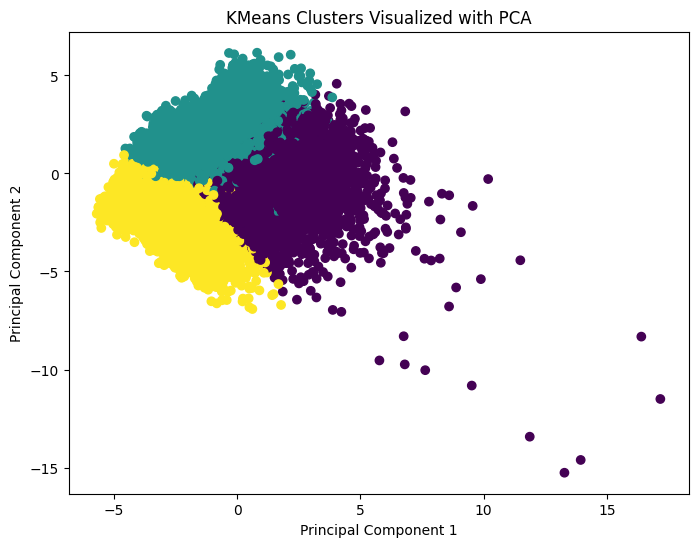

In [23]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce your data to 2 principal components for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(America_standardized)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=America['Cluster'], cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("KMeans Clusters Visualized with PCA")
plt.show()

In [24]:
# Apply SVD
U, S, Vt = svd(America_standardized)
singular_values = pd.Series(S, name="Singular Values")

# Display top singular values
print("\nTop Singular Values:\n", singular_values.head(10))



Top Singular Values:
 0    243.915022
1    224.288901
2    174.138524
3    162.820253
4    132.822639
5    121.246163
6    105.653314
7    105.161965
8    101.135412
9     97.677085
Name: Singular Values, dtype: float64



Highly Correlated Features (|corr| > 0.8):
    Feature 1  Feature 2  Correlation
0          6          7     0.823590
1         26         30     0.832921


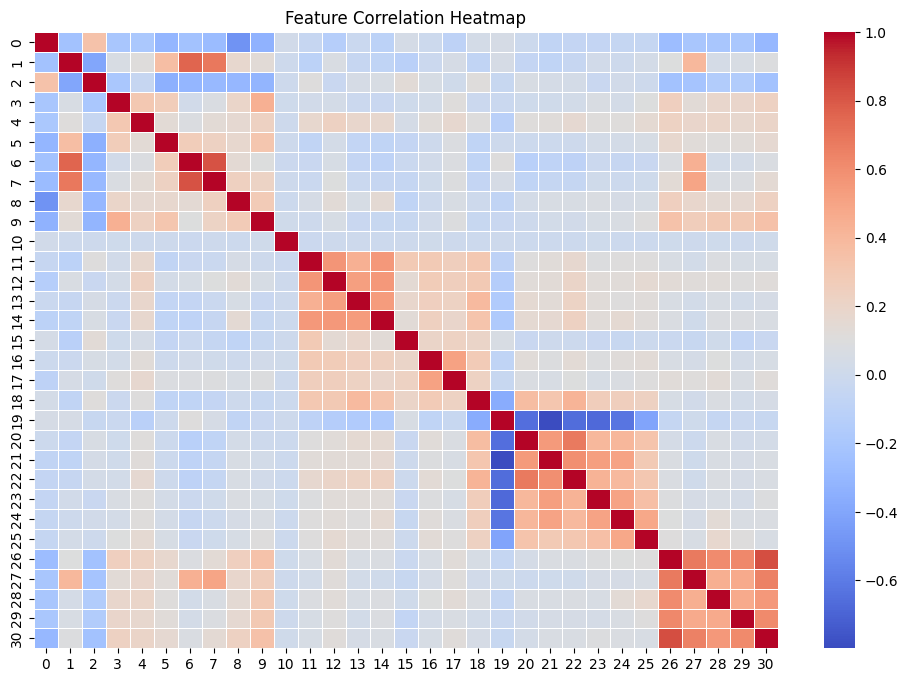

In [25]:
# Compute correlation matrix
correlation_matrix = America_standardized.corr()

# Identify highly correlated features (absolute correlation > 0.8, excluding diagonal)
highly_correlated_features = correlation_matrix.where(
    np.triu(np.abs(correlation_matrix) > 0.8, k=1)
).stack().reset_index()
highly_correlated_features.columns = ["Feature 1", "Feature 2", "Correlation"]

print("\nHighly Correlated Features (|corr| > 0.8):\n", highly_correlated_features)

# Plot heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()